## Ba + Zr + 3s <-> BaZrS3

In [1]:
import numpy as np
from thermopot import materials, calculations, reactions

In [2]:
BaZrS3_calc = calculations.Calculation(volume=0.487976E+03,energy=-1425525.405951922,xc='pbesol',NAtoms=20)
Ba_calc = calculations.Calculation(volume=0.564599E+02,energy=-225060.517335015, xc='pbesol',NAtoms=1)
Zr_calc = calculations.Calculation(volume=0.448970E+02,energy=-197453.101608662,xc='pbesol',NAtoms=2)
S_calc = calculations.Calculation(energy=-0.347575504588933e06,xc="pbesol",NAtoms=32,volume=832.91786077871541)


In [3]:
BaZrS3 = materials.Solid("BaZrS3",{"Ba": 1,"Zr": 1,"S":3},
                                                          "."
                                                          "./BaZrS3/phonopy_output/BaZrS3_Pnma.dat",calculation=BaZrS3_calc)
Ba = materials.Solid("Ba",{"Ba": 1},"../BaZrS3/phonopy_output/Ba_Im-3m.dat",calculation=Ba_calc)
Zr = materials.Solid("Zr",{"Zr": 1},"../BaZrS3/phonopy_output/Zr_P63_mmc"
                                    ".dat",calculation=Zr_calc)
S = materials.Solid("S",{"S":1},"../BaZrS3/phonopy_output/S_adam.dat",
                    calculation=S_calc)

In [4]:
bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1})
bulk_reaction.DH().potential

U_func(T) is  0.07754692702345353
E_dft is  -225060.517335015
PV is  5.851656283223985e-29
fu_cell is  1.0
U_func(T) is  0.15952164469755237
E_dft is  -197453.101608662
PV is  4.6532461472285155e-29
fu_cell is  2.0
U_func(T) is  2.8196520986029996
E_dft is  -347575.504588933
PV is  8.632585309990366e-28
fu_cell is  32.0
U_func(T) is  1.6530090329654195
E_dft is  -1425525.405951922
PV is  5.057514849410834e-28
fu_cell is  4.0


-9.088191297429148

In [5]:
bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1},temperature=0,pressure=0)
bulk_reaction.DU().potential

-9.08198564517079

The above figure compares to a formation energy of -2.201 eV/atom reported on the materials project. -9.08/4 = -2.27: We are very close!

In [6]:
T = np.linspace(100,1000,100) # K
P = np.array( np.logspace(1,7,100),ndmin=2).transpose() # Pa

bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1},temperature=T,pressure=P)

U_func(T) is  [0.02723279 0.02947166 0.03172669 0.03399469 0.03627323 0.03856045
 0.04085489 0.04315538 0.045461   0.04777102 0.0500848  0.05240186
 0.05472204 0.05704465 0.05936942 0.0616961  0.06402448 0.0663544
 0.0686857  0.07101825 0.07335191 0.0756866  0.07802223 0.08035878
 0.0826961  0.08503412 0.08737279 0.08971206 0.09205188 0.09439221
 0.09673302 0.09907426 0.10141592 0.10375797 0.10610041 0.10844318
 0.11078627 0.11312964 0.11547329 0.11781719 0.12016135 0.12250573
 0.12485032 0.12719513 0.12954012 0.13188532 0.13423069 0.13657623
 0.13892192 0.14126776 0.14361374 0.14595985 0.1483061  0.15065246
 0.15299894 0.15534553 0.15769224 0.16003905 0.16238596 0.16473296
 0.16708005 0.16942722 0.17177447 0.17412181 0.17646922 0.1788167
 0.18116425 0.18351187 0.18585956 0.18820731 0.19055512 0.19290299
 0.19525091 0.19759889 0.19994691 0.20229499 0.20464311 0.20699129
 0.20933951 0.21168777 0.21403608 0.21638442 0.21873281 0.22108123
 0.22342969 0.22577819 0.22812672 0.23047528 0.232

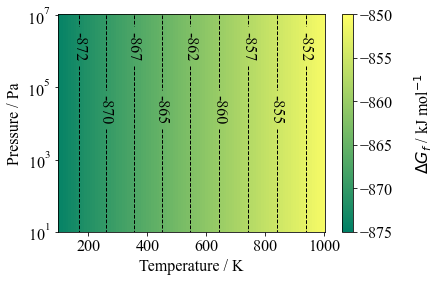

In [7]:
GFE = bulk_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-875,-850])

## 2Ba+2Zr+3S2 <-> 2BaZrS3

U_func(T) is  [0.02723279 0.02947166 0.03172669 0.03399469 0.03627323 0.03856045
 0.04085489 0.04315538 0.045461   0.04777102 0.0500848  0.05240186
 0.05472204 0.05704465 0.05936942 0.0616961  0.06402448 0.0663544
 0.0686857  0.07101825 0.07335191 0.0756866  0.07802223 0.08035878
 0.0826961  0.08503412 0.08737279 0.08971206 0.09205188 0.09439221
 0.09673302 0.09907426 0.10141592 0.10375797 0.10610041 0.10844318
 0.11078627 0.11312964 0.11547329 0.11781719 0.12016135 0.12250573
 0.12485032 0.12719513 0.12954012 0.13188532 0.13423069 0.13657623
 0.13892192 0.14126776 0.14361374 0.14595985 0.1483061  0.15065246
 0.15299894 0.15534553 0.15769224 0.16003905 0.16238596 0.16473296
 0.16708005 0.16942722 0.17177447 0.17412181 0.17646922 0.1788167
 0.18116425 0.18351187 0.18585956 0.18820731 0.19055512 0.19290299
 0.19525091 0.19759889 0.19994691 0.20229499 0.20464311 0.20699129
 0.20933951 0.21168777 0.21403608 0.21638442 0.21873281 0.22108123
 0.22342969 0.22577819 0.22812672 0.23047528 0.232

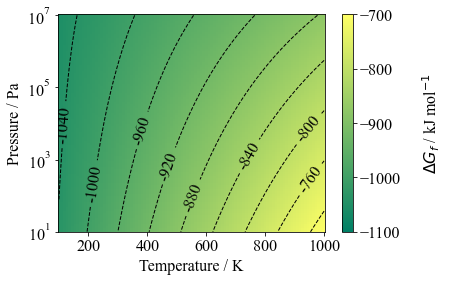

In [8]:
S2 = materials.IdealGas("S2",{'S':2},thermo_file="../BaZrS3/nist_janaf/S2.dat",energies={"pbesol":-0.217220682510473e05},zpe_pbesol=0.04421415)
S2_reaction = reactions.Reaction({Ba:2,Zr:2,S2:3},{BaZrS3:2},temperature=T,pressure=P,fu=2)
GFE = S2_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-1100, -700])

# 8Ba + 8Zr + 3S8 <-> 8BaZrS3

U_func(T) is  [0.02723279 0.02947166 0.03172669 0.03399469 0.03627323 0.03856045
 0.04085489 0.04315538 0.045461   0.04777102 0.0500848  0.05240186
 0.05472204 0.05704465 0.05936942 0.0616961  0.06402448 0.0663544
 0.0686857  0.07101825 0.07335191 0.0756866  0.07802223 0.08035878
 0.0826961  0.08503412 0.08737279 0.08971206 0.09205188 0.09439221
 0.09673302 0.09907426 0.10141592 0.10375797 0.10610041 0.10844318
 0.11078627 0.11312964 0.11547329 0.11781719 0.12016135 0.12250573
 0.12485032 0.12719513 0.12954012 0.13188532 0.13423069 0.13657623
 0.13892192 0.14126776 0.14361374 0.14595985 0.1483061  0.15065246
 0.15299894 0.15534553 0.15769224 0.16003905 0.16238596 0.16473296
 0.16708005 0.16942722 0.17177447 0.17412181 0.17646922 0.1788167
 0.18116425 0.18351187 0.18585956 0.18820731 0.19055512 0.19290299
 0.19525091 0.19759889 0.19994691 0.20229499 0.20464311 0.20699129
 0.20933951 0.21168777 0.21403608 0.21638442 0.21873281 0.22108123
 0.22342969 0.22577819 0.22812672 0.23047528 0.232

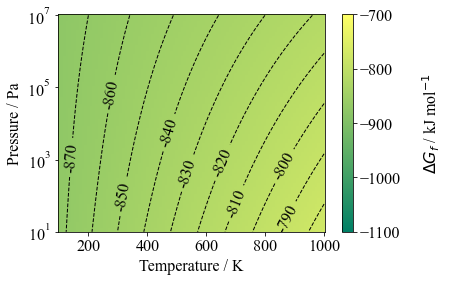

In [24]:
S8 = materials.IdealGas("S8",{'S':8},thermo_file="../BaZrS3/nist_janaf/S8"
                                                 ".dat",
                        energies={"pbesol":-86893.631040193},zpe_pbesol=0.32891037)
S8_reaction = reactions.Reaction({Ba:8,Zr:8,S8:3},{BaZrS3:8},temperature=T,
pressure=P,fu=8)
GFE = S8_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-1100, -700])

# BaS + ZrS2 <-> BaZrS3

In [9]:
BaS_calc = calculations.Calculation(volume=0.632552E+02,energy=-235926.586148547, xc='pbesol',NAtoms=2)
ZrS2_calc = calculations.Calculation(volume=0.667493E+02,energy=-120454.748375135,xc='pbesol',NAtoms=3)
BaS = materials.Solid("BaS",{"Ba": 1, "S": 1},"../BaZrS3/phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)
ZrS2 = materials.Solid("ZrS2",{"Zr": 1,"S": 2}, "../BaZrS3/phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)

In [10]:
bulk_reaction = reactions.Reaction({BaS:1,ZrS2:1},{BaZrS3:1},temperature=0,pressure=0)
bulk_reaction.DH(units="eV").potential

U_func(T) is  0.04764310801278196
E_dft is  -235926.586148547
PV is  0.0
fu_cell is  1.0
U_func(T) is  0.11777966712574081
E_dft is  -120454.748375135
PV is  0.0
fu_cell is  1.0
U_func(T) is  0.6321565958030674
E_dft is  -1425525.405951922
PV is  0.0
fu_cell is  4.0


-0.024347924685571343

The perovskite is not as stable for decomposition into ternary phases as expected. Previously reported energies are in the range -450 to -200 meV per fu (https://onlinelibrary.wiley.com/doi/full/10.1002/adom.202101704). The calculated has been verified by hand. If we do not include U_func (from the phonon calculation at T=0) then the calculated energy increases to -16.96meV.

Let's compare the calculated DFT energies to those on the materials project.

The uncorrected DFT energy for BaZrS3 (20 atoms) is -127.5651 eV. For BaS it is -10.2125 eV (2 atoms). For ZrS2 it is
-21.3614 eV (3 atoms). If we calculate the change in energy:

In [11]:
-10.2125 + -21.3614 - (-127.5651/4)

0.3173749999999984

Ok, so that is 317 meV which is much closer to that reported in the literature.

# BaS2 + ZrS <-> BaZrS3

In [12]:
BaS2_calc = calculations.Calculation(volume=0.168953E+03,energy=-493576.992662581, xc='pbesol',NAtoms=6)
ZrS_calc = calculations.Calculation(volume=0.691428E+02,energy=-219183.017830408,xc='pbesol',NAtoms=4)
BaS2 = materials.Solid("BaS2",{"Ba": 1, "S": 2},"."
                                               ""
                                               "./BaZrS3/phonopy_output/BaS2_C2_c.dat",calculation=BaS2_calc)
ZrS = materials.Solid("ZrS",{"Zr": 1,"S": 1}, "."
                                               ""
                                              "./BaZrS3/phonopy_output/ZrS_P4_nmm.dat",
                      calculation=ZrS_calc)

In [13]:
bulk_reaction = reactions.Reaction({BaS2:1,ZrS:1},{BaZrS3:1},temperature=0,
                                   pressure=0)
bulk_reaction.DH(units="eV").potential

U_func(T) is  0.18213935334274844
E_dft is  -493576.992662581
PV is  0.0
fu_cell is  2.0
U_func(T) is  0.15196830831510003
E_dft is  -219183.017830408
PV is  0.0
fu_cell is  2.0
U_func(T) is  0.6321565958030674
E_dft is  -1425525.405951922
PV is  0.0
fu_cell is  4.0


-1.3552561679389328

U_func(T) is  [0.23540744 0.24513369 0.25526537 0.26575056 0.27654599 0.28761533
 0.29892776 0.31045692 0.32218007 0.33407748 0.34613191 0.35832825
 0.37066587 0.38311777 0.39567395 0.40832545 0.42106427 0.43388319
 0.44677577 0.45973615 0.47275908 0.4858398  0.49897398 0.51216274
 0.5253967  0.53867274 0.551988   0.56533986 0.57872592 0.59214397
 0.60559197 0.61906808 0.63257056 0.64609782 0.6596508  0.67322544
 0.68682052 0.70043489 0.7140675  0.72771737 0.74138359 0.7550653
 0.7687617  0.78247206 0.79619566 0.80993318 0.82368255 0.8374432
 0.85121462 0.8649963  0.87878778 0.89258863 0.90639843 0.92021679
 0.93404333 0.94787773 0.96172042 0.97557025 0.98942691 1.00329015
 1.01715969 1.0310353  1.04491674 1.05880378 1.07269621 1.08659384
 1.10049647 1.11440443 1.12831699 1.142234   1.15615529 1.17008073
 1.18401015 1.19794345 1.21188047 1.2258211  1.23976522 1.25371272
 1.26766383 1.28161808 1.29557537 1.30953561 1.3234987  1.33746457
 1.35143311 1.36540427 1.37937795 1.39335408 1.407

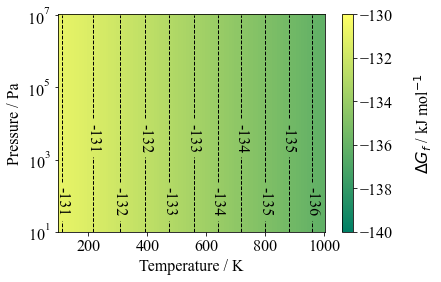

In [15]:
T = np.linspace(100,1000,100) # K
P = np.array( np.logspace(1,7,100),ndmin=2).transpose() # Pa
bulk_reaction = reactions.Reaction({BaS2:1,ZrS:1},{BaZrS3:1},temperature=T, pressure=P)
GFE = bulk_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-140, -130])

# 2BaS + 2ZrS + 2S2 <-> 2BaZrS3


U_func(T) is  [0.06707559 0.0706776  0.07441474 0.07826545 0.08221208 0.08624021
 0.09033798 0.09449557 0.09870487 0.10295908 0.10725251 0.11158035
 0.11594145 0.12032871 0.12473933 0.12917086 0.13362118 0.13808843
 0.142571   0.14706745 0.15157653 0.15609711 0.16062822 0.16516993
 0.16972031 0.17427871 0.17884449 0.18341712 0.18799609 0.19258095
 0.19717129 0.20176673 0.20636694 0.21097159 0.21558084 0.22019393
 0.22481063 0.22943072 0.23405401 0.23868032 0.24330946 0.24794128
 0.25257564 0.25721241 0.26185144 0.26649285 0.27113629 0.27578164
 0.28042882 0.28507774 0.28972831 0.29438045 0.29903411 0.3036892
 0.30834566 0.31300343 0.31766259 0.32232294 0.32698442 0.331647
 0.33631062 0.34097525 0.34564083 0.35030735 0.35497476 0.35964302
 0.3643121  0.36898206 0.37365278 0.37832422 0.38299637 0.3876692
 0.39234268 0.39701679 0.40169151 0.40636682 0.4110427  0.41571912
 0.42039614 0.42507367 0.42975169 0.43443019 0.43910915 0.44378856
 0.44846841 0.45314868 0.45782936 0.46251044 0.46719

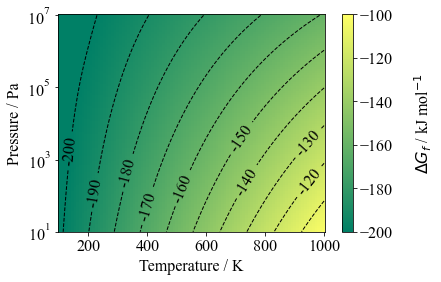

In [30]:
S2_binary_reaction = reactions.Reaction({BaS:2,ZrS:2,S2:1},{BaZrS3:2},
                                       temperature=T, pressure=P,fu=2)
GFE = S2_binary_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-200, -100])

# 8BaS + 8ZrS + S8 <-> 8BaZrS3

U_func(T) is  [0.06707559 0.0706776  0.07441474 0.07826545 0.08221208 0.08624021
 0.09033798 0.09449557 0.09870487 0.10295908 0.10725251 0.11158035
 0.11594145 0.12032871 0.12473933 0.12917086 0.13362118 0.13808843
 0.142571   0.14706745 0.15157653 0.15609711 0.16062822 0.16516993
 0.16972031 0.17427871 0.17884449 0.18341712 0.18799609 0.19258095
 0.19717129 0.20176673 0.20636694 0.21097159 0.21558084 0.22019393
 0.22481063 0.22943072 0.23405401 0.23868032 0.24330946 0.24794128
 0.25257564 0.25721241 0.26185144 0.26649285 0.27113629 0.27578164
 0.28042882 0.28507774 0.28972831 0.29438045 0.29903411 0.3036892
 0.30834566 0.31300343 0.31766259 0.32232294 0.32698442 0.331647
 0.33631062 0.34097525 0.34564083 0.35030735 0.35497476 0.35964302
 0.3643121  0.36898206 0.37365278 0.37832422 0.38299637 0.3876692
 0.39234268 0.39701679 0.40169151 0.40636682 0.4110427  0.41571912
 0.42039614 0.42507367 0.42975169 0.43443019 0.43910915 0.44378856
 0.44846841 0.45314868 0.45782936 0.46251044 0.46719

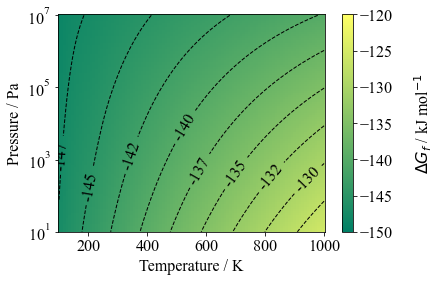

In [31]:
S8_binary_reaction = reactions.Reaction({BaS:8,ZrS:8,S8:1},{BaZrS3:8},
                                       temperature=T, pressure=P,fu=8)
GFE = S8_binary_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-150, -120])

In [6]:
BaS_calc = calculations.Calculation(volume=0.632552E+02,energy=-235926.586148547, xc='pbesol',NAtoms=2)
ZrS2_calc = calculations.Calculation(volume=0.667493E+02,energy=-120454.748375135,xc='pbesol',NAtoms=3)
BaS = materials.Solid("BaS",{"Ba": 1, "S": 1},"../BaZrS3/phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)
ZrS2 = materials.Solid("ZrS2",{"Zr": 1,"S": 2}, "../BaZrS3/phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)

In [11]:
bulk_reaction = reactions.Reaction({BaS:1,ZrS2:1},{BaZrS3:1},temperature=0,pressure=0)
bulk_reaction.DH(units="eV").potential

U_func(T) is  0.04764310801278196
E_dft is  -235926.586148547
PV is  0.0
fu_cell is  1.0
U_func(T) is  0.11777966712574081
E_dft is  -120454.748375135
PV is  0.0
fu_cell is  1.0
U_func(T) is  0.6321565958030674
E_dft is  -1425525.405951922
PV is  0.0
fu_cell is  4.0


-0.024347924685571343

The perovskite is not as stable for decomposition into ternary phases as expected. Previously reported energies are in the range -450 to -200 meV per fu (https://onlinelibrary.wiley.com/doi/full/10.1002/adom.202101704). The calculated has been verified by hand. If we do not include U_func (from the phonon calculation at T=0) then the calculated energy increases to -16.96meV.

Let's compare the calculated DFT energies to those on the materials project.

The uncorrected DFT energy for BaZrS3 (20 atoms) is -127.5651 eV. For BaS it is -10.2125 eV (2 atoms). For ZrS2 it is
-21.3614 eV (3 atoms). If we calculate the change in energy:

In [10]:
-10.2125 + -21.3614 - (-127.5651/4)

0.3173749999999984

Ok, so that is 317 meV which is much closer to that reported in the literature.